# Evaluating Gene Correlations - First heart field

In [1]:
import numpy as np
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [2]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(11,6)})

import mplscience

mplscience.set_style(reset_current=True)
plt.rcParams['figure.dpi'] = 200

In [3]:
Path="/home/mgander/Unrelated/moscotTime_Reproducibility/Data/"

# Define time points
t=[3.5, 4.5, 5.25, 5.5]+[6.25+x/4 for x in range(0,10)]+[8.5]+[9.5+x for x in range(0,5)]
ts=[str(a) for a in [3.5, 4.5, 5.25, 5.5, 6.25]] + [str(a) for a in np.arange(6.5, 8.5, 0.25)] + ['8.5a', '8.5b']+ [str(a) for a in np.arange(9.5, 14.5, 1)]
ts=['E'+a for a in ts]

In [4]:
def load_growth_rates(ts0, ts1):
    adata=sc.read(f"{Path}/anndatas/Comb_anndatas/adata_{ts0}_{ts1}.h5ad")
    grM=np.load(f'{Path}/moscot_maps/{ts0}_growth_rates.npy')
    grT=np.load(f'{Path}/TOME_transport_maps/{ts0}_growth_rates.npy')
    A0=adata[adata.obs['day']==min(set(adata.obs['day']))].copy()
    A0.obs['growth_rate_moscot']=grM
    A0.obs['growth_rate_clTOME']=grT
    A0.obs['Cell type']=A0.obs['cell_type']
    return(A0.obs)

In [5]:
sc.settings.verbosity = 0

In [6]:
def get_ylim(df):
    cts=list(set(df['cell_type']))
    maxs=[]

    for ct in cts:
        dfs=df[df['cell_type']==ct]

        np_moscot_hist=np.histogram(dfs['growth_rate_moscot'], bins=np.linspace(0,4,50))[0]
        np_clTOME_hist=np.histogram(dfs['growth_rate_clTOME'], bins=np.linspace(0,4,50))[0]

        maxs.append(max(max(np_moscot_hist), max(np_clTOME_hist)))
    return(max(maxs))

In [10]:
T=[]
for i in range(13):
    ts0=ts[i]
    print(ts0)
    ts1=ts[i+1]
    A0obs=load_growth_rates(ts0, ts1)
    
    # Restricting to the k=5 cell types with the most cells

    k=5
    cts=list(A0obs['cell_type'].value_counts().index)[:k]
    A0s=A0obs[A0obs['cell_type'].isin(cts)].copy()
    A0s['Cell type']=list(A0s['Cell type'])
    
    T.append(A0s)

E3.5
E4.5
E5.25
E5.5
E6.25
E6.5
E6.75
E7.0
E7.25
E7.5
E7.75
E8.0
E8.25


# Pre-Gastrulation

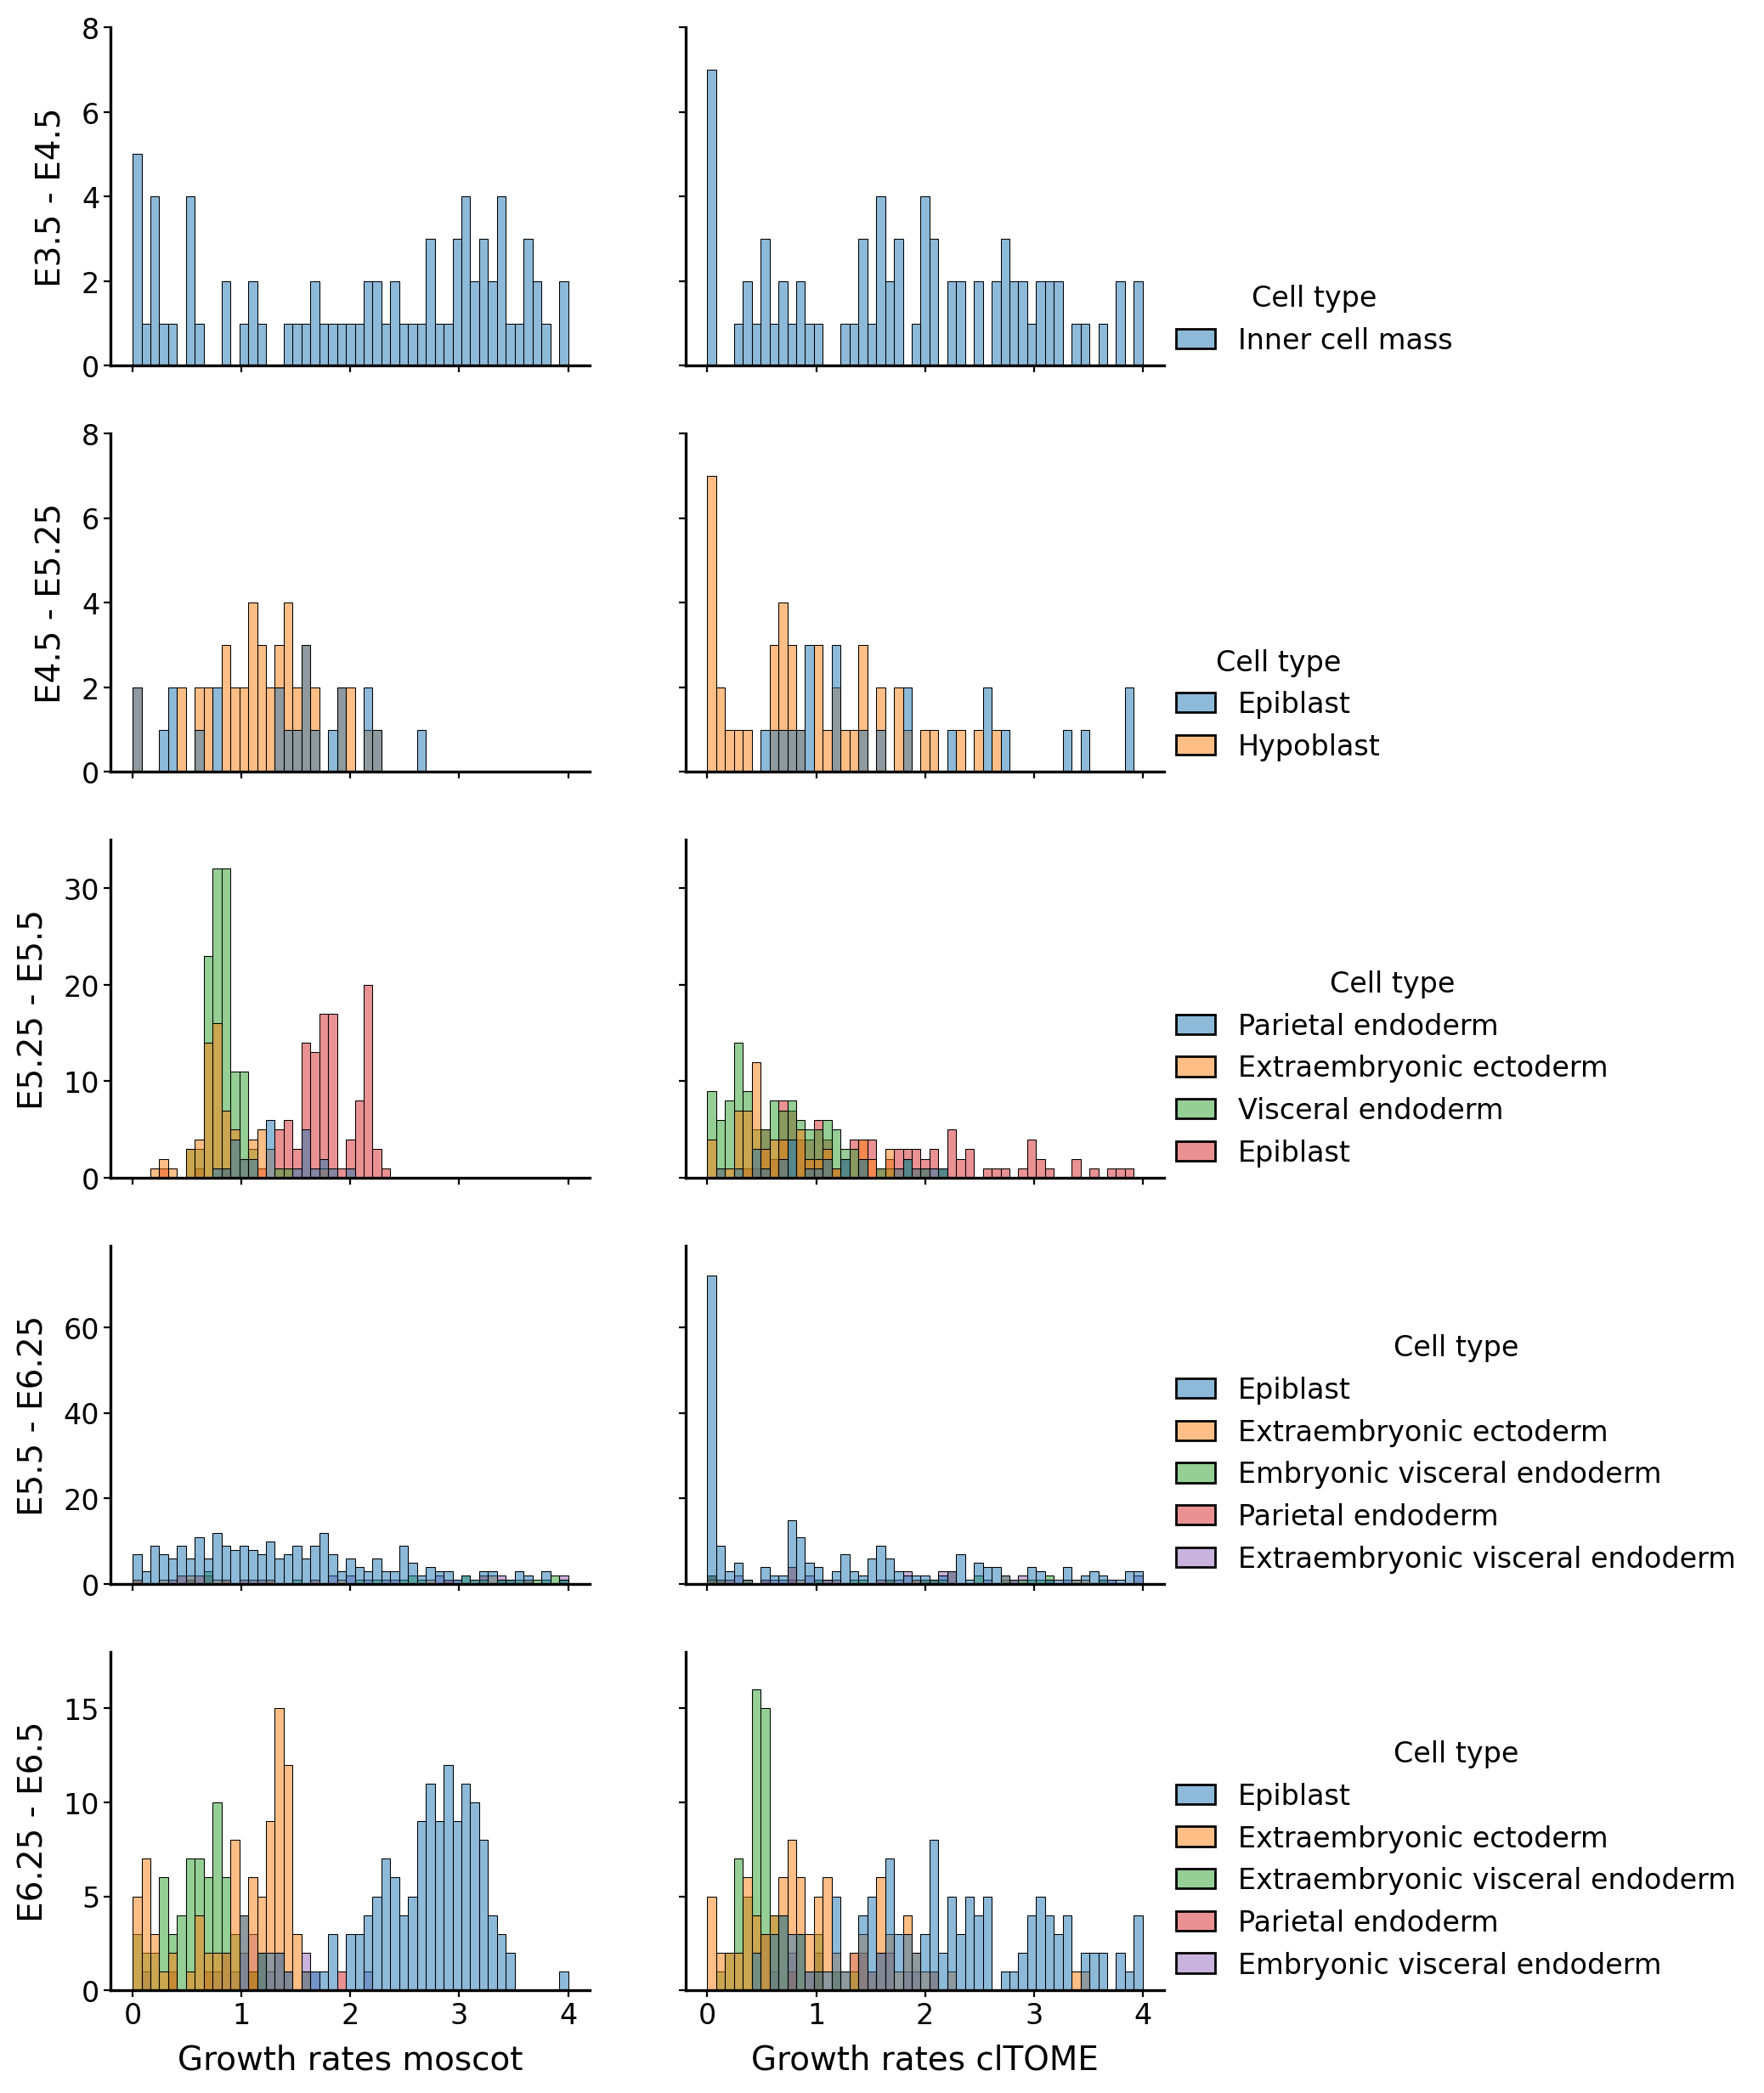

In [11]:
n0=0
n1=5

fig, axs = plt.subplots(n1-n0, 2, figsize=(8, (n1-n0)*3))

for i in range(n0,n1):
    df=T[i-n0]
    ylim=int(round(get_ylim(df)*1.1))

    g0=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', bins=np.linspace(0,4,50), ax=axs[i, 0])
    axs[i, 0].legend_.remove()
    axs[i, 0].set_ylim(0, ylim)
    if i<n1-1:
        g0.set(xticklabels=[])  # remove the tick labels
        g0.set(xlabel=None)  # remove the axis label
    else:
        g0.set(xlabel='Growth rates moscot')  # remove the axis label

    g0.set(ylabel=f'{ts[i]} - {ts[i+1]}')
    
    g1=sns.histplot(data=df, x="growth_rate_clTOME", hue='Cell type', bins=np.linspace(0,4,50), ax=axs[i, 1])
    sns.move_legend(g1,(1,0))
    plt.setp(g1.get_legend().get_title(), fontsize='12')
    
    if i<n1-1:
        g1.set(xticklabels=[])  # remove the tick labels
        g1.set(xlabel=None)  # remove the axis label
    else:
        g1.set(xlabel='Growth rates clTOME')  # remove the axis label
    g1.set(yticklabels=[])  # remove the tick labels
    g1.set(ylabel=None)  # remove the axis label
    
    axs[i, 1].set_ylim(0, ylim)
plt.show()

# Gastrulation

In [ ]:
palette=

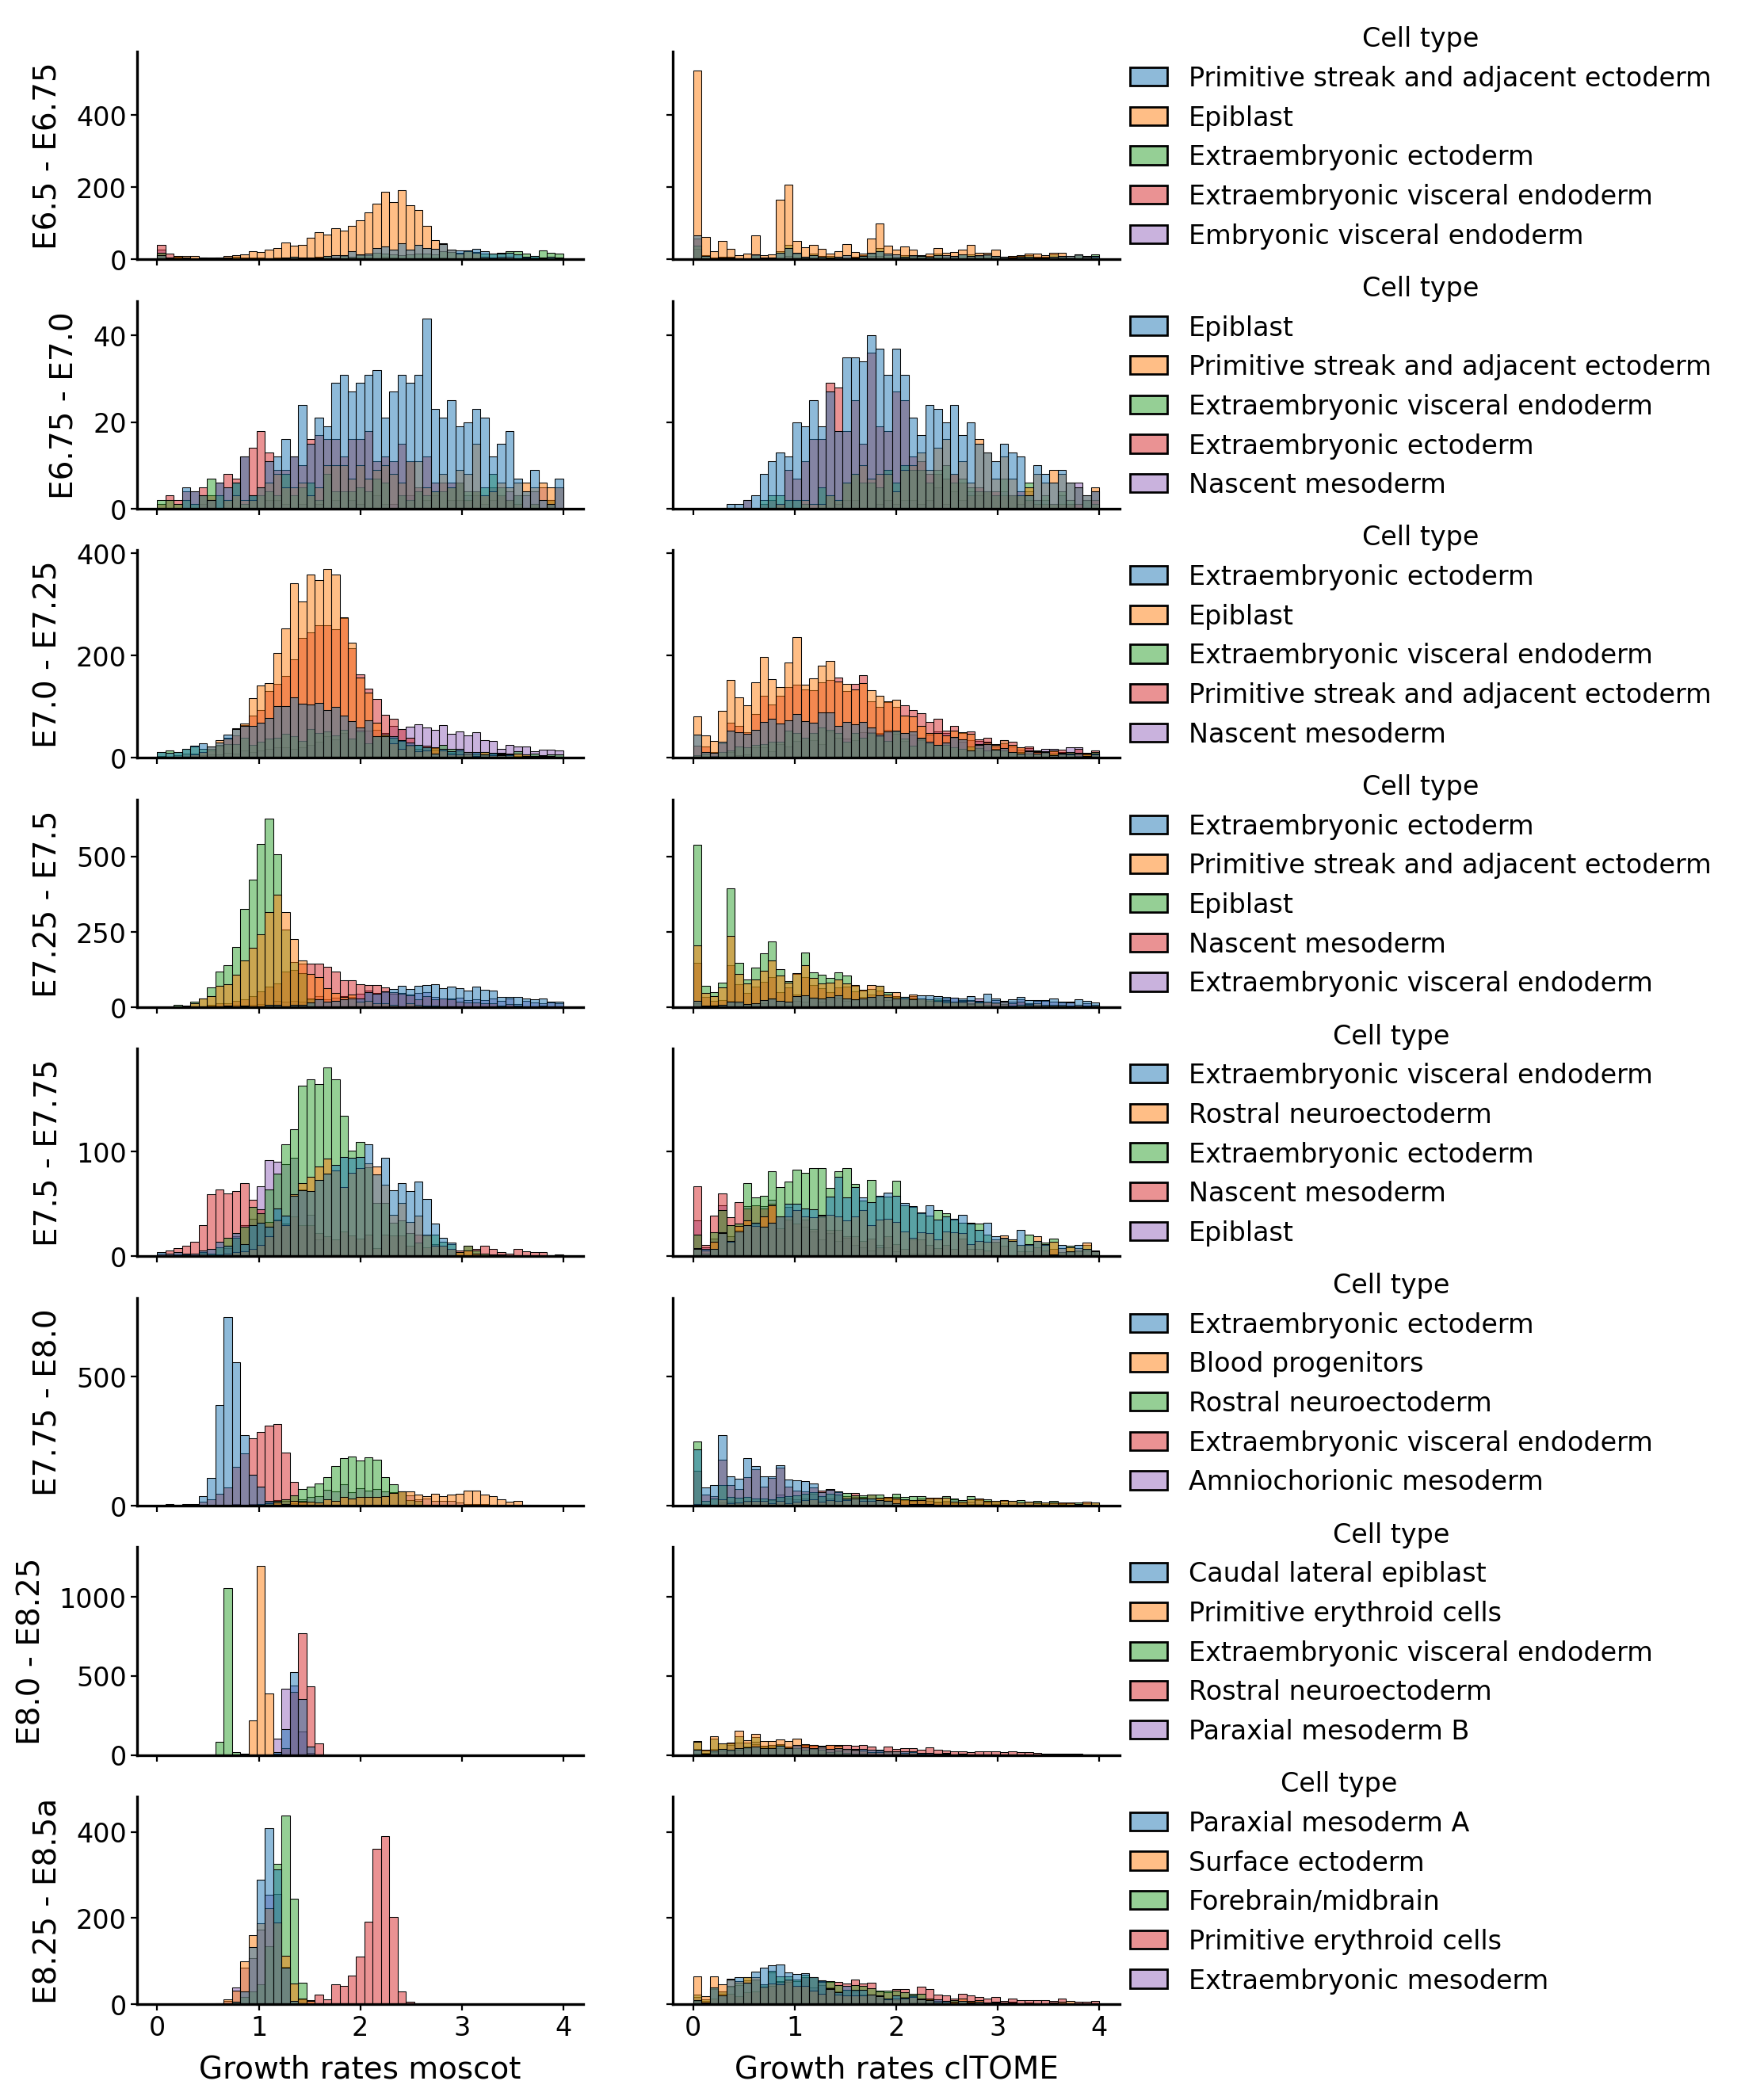

In [13]:
n0=5
n1=13

fig, axs = plt.subplots(n1-n0, 2, figsize=(8, (n1-n0)*2))

for i in range(n0,n1):
    df=T[i]
    ylim=int(round(get_ylim(df)*1.1))

    g0=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', bins=np.linspace(0,4,50), ax=axs[i-n0, 0])
    axs[i-n0, 0].legend_.remove()
    axs[i-n0, 0].set_ylim(0, ylim)
    if i<n1-1:
        g0.set(xticklabels=[])  # remove the tick labels
        g0.set(xlabel=None)  # remove the axis label
    else:
        g0.set(xlabel='Growth rates moscot')  # remove the axis label

    g0.set(ylabel=f'{ts[i]} - {ts[i+1]}')
    
    g1=sns.histplot(data=df, x="growth_rate_clTOME", hue='Cell type', bins=np.linspace(0,4,50), ax=axs[i-n0, 1])
    sns.move_legend(g1,(1,0))
    plt.setp(g1.get_legend().get_title(), fontsize='12')
    
    if i<n1-1:
        g1.set(xticklabels=[])  # remove the tick labels
        g1.set(xlabel=None)  # remove the axis label
    else:
        g1.set(xlabel='Growth rates clTOME')  # remove the axis label
    g1.set(yticklabels=[])  # remove the tick labels
    g1.set(ylabel=None)  # remove the axis label
    
    axs[i-n0, 1].set_ylim(0, ylim)
plt.show()

# Organogenesis

In [ ]:
n0=13
n1=19

fig, axs = plt.subplots(n1-n0, 2, figsize=(8, (n1-n0)*3))

for i in range(n0,n1):
    df=T[i]
    ylim=int(round(get_ylim(df)*1.1))

    g0=sns.histplot(data=df, x="growth_rate_moscot", hue='Cell type', bins=np.linspace(0,4,50), ax=axs[i-n0, 0])
    axs[i-n0, 0].legend_.remove()
    axs[i-n0, 0].set_ylim(0, ylim)
    if i<n1-1:
        g0.set(xticklabels=[])  # remove the tick labels
        g0.set(xlabel=None)  # remove the axis label
    
    g1=sns.histplot(data=df, x="growth_rate_clTOME", hue='Cell type', bins=np.linspace(0,4,50), ax=axs[i-n0, 1])
    sns.move_legend(g1,(1,0))
    plt.setp(g1.get_legend().get_title(), fontsize='12')
    
    if i<n1-1:
        g1.set(xticklabels=[])  # remove the tick labels
        g1.set(xlabel=None)  # remove the axis label
    g1.set(yticklabels=[])  # remove the tick labels
    g1.set(ylabel=None)  # remove the axis label
    
    axs[i-n0, 1].set_ylim(0, ylim)

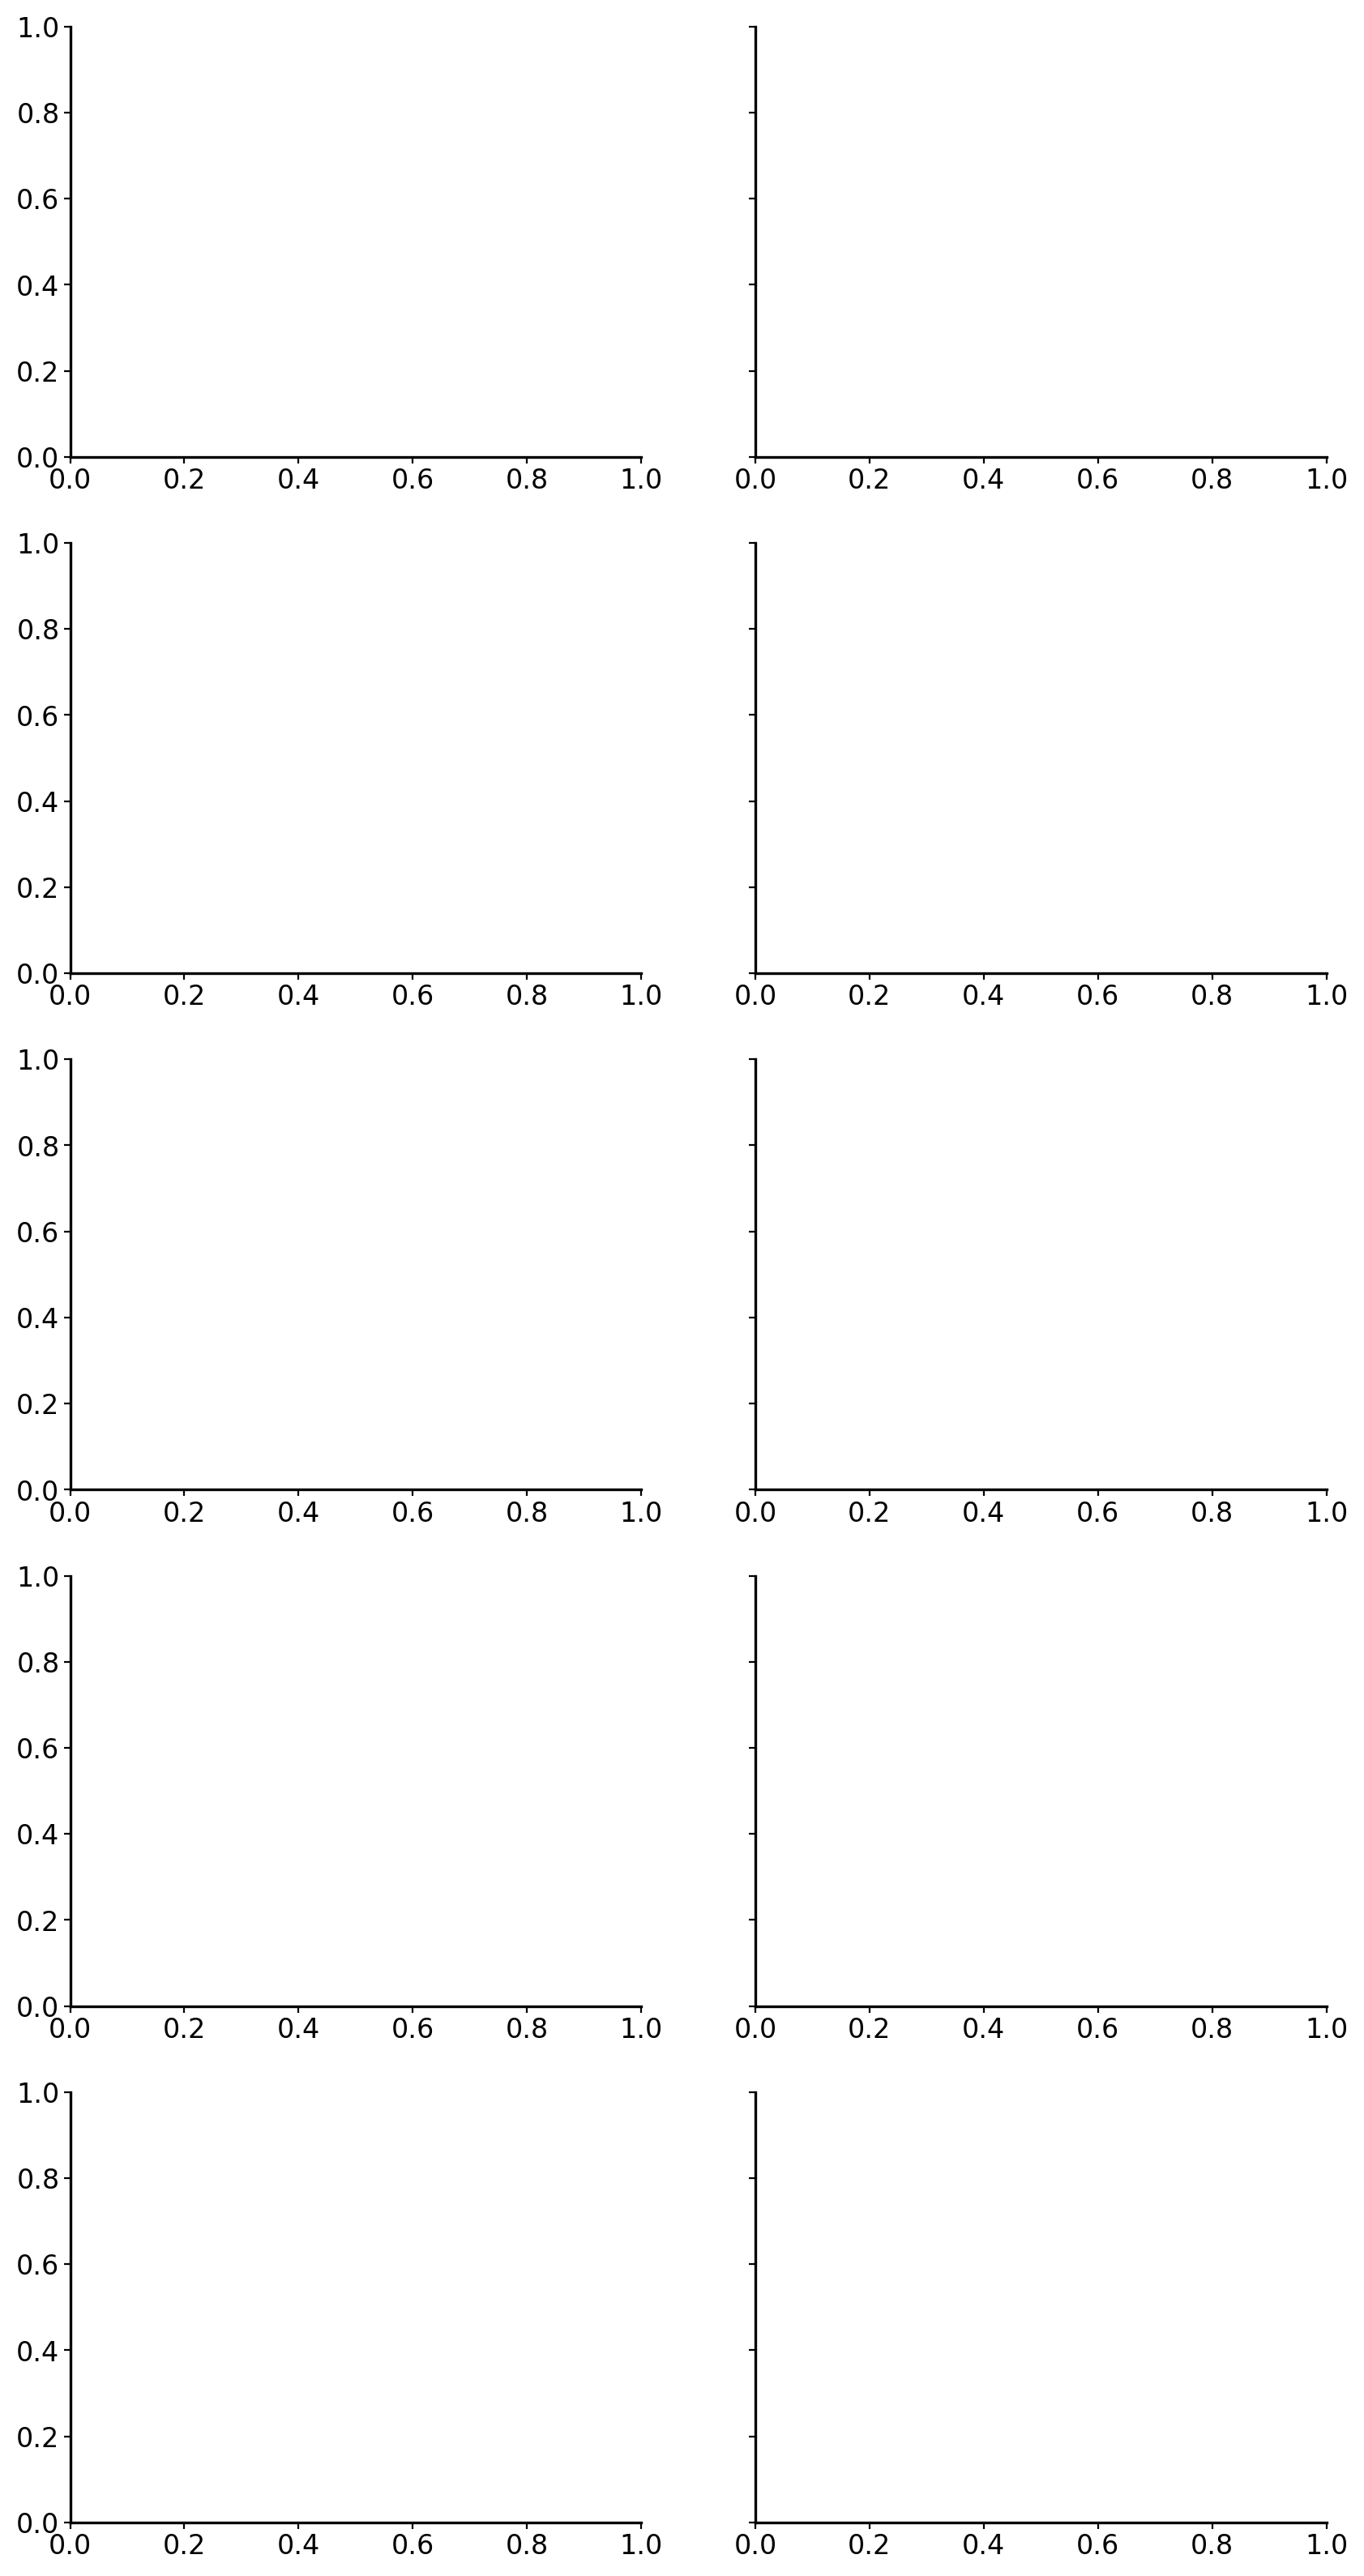

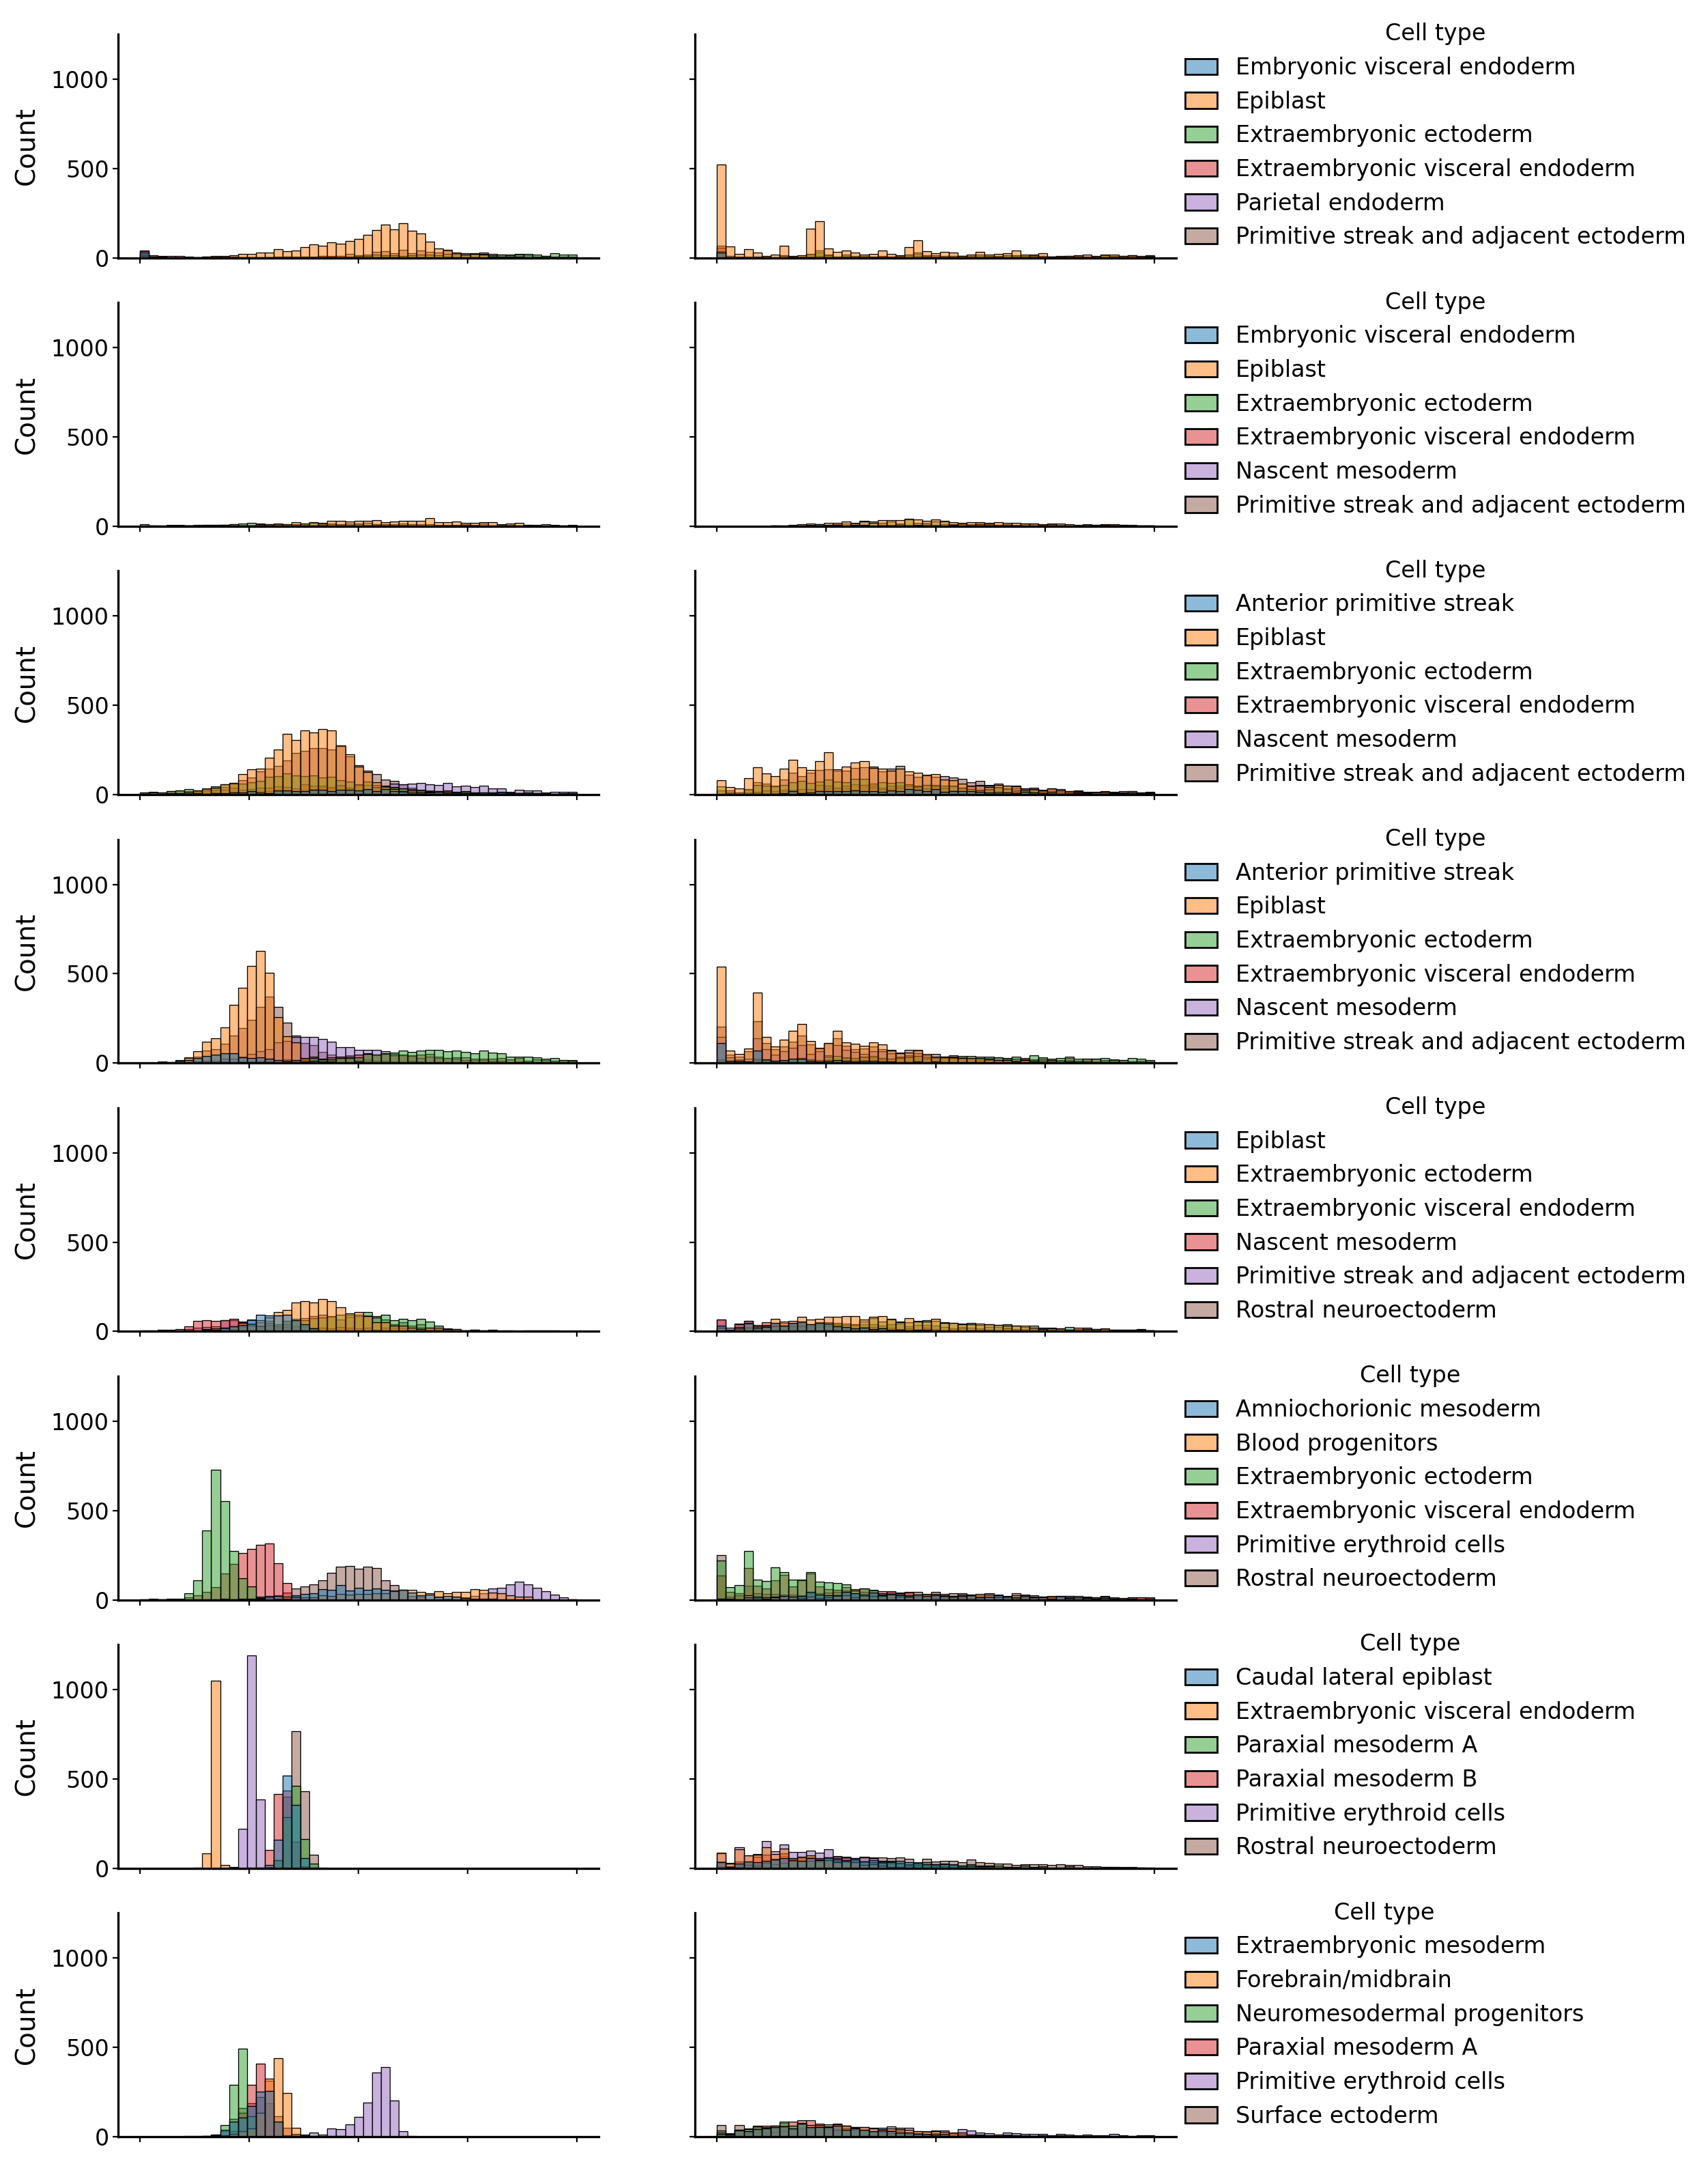

In [178]:
fig, axes = plt.subplots(8, 2, figsize=(10, 20), sharey=True)

for i in range(5,13):
    ts0=ts[i]
    ts1=ts[i+1]
    A0obs=load_growth_rates(ts0, ts1)
    
    # Restricting to the k=6 cell types with the most cells

    k=6
    cts=list(A0obs['cell_type'].value_counts().index)[:k]
    A0s=A0obs[A0obs['cell_type'].isin(cts)]
    
    
    g=sns.histplot(ax=axes[i-5,0], data=A0s, x='growth_rate_moscot', hue='Cell type', bins=np.linspace(0,4,50))
    g.legend_.remove()
    g.set(ylim=(0, max(max(np_moscot_hist), max(np_clTOME_hist))))

    
    if i!=4:
        g.set(xticklabels=[])  # remove the tick labels
        g.set(xlabel=None)  # remove the axis label

    g=sns.histplot(ax=axes[i-5,1], data=A0s, x='growth_rate_clTOME', hue='Cell type', bins=np.linspace(0,4,50))
    sns.move_legend(g,(1,0))
    plt.setp(g.get_legend().get_title(), fontsize='12')
    if i!=4:
        g.set(xticklabels=[])  # remove the tick labels
        g.set(xlabel=None)  # remove the axis label
plt.show()

In [177]:
13-5

8

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20), sharey=True)

g=[]
h=[]
for i in range(5):
    
    ts0=ts[i]
    ts1=ts[i+1]
    A0obs=load_growth_rates(ts0, ts1)
    
    # Restricting to the k=6 cell types with the most cells

    k=6
    cts=list(A0obs['cell_type'].value_counts().index)[:k]
    A0s=A0obs[A0obs['cell_type'].isin(cts)]
        
    np_moscot_hist=np.histogram(A0s['growth_rate_moscot'], bins=np.linspace(0,4,50))[0]
    np_clTOME_hist=np.histogram(A0s['growth_rate_clTOME'], bins=np.linspace(0,4,50))[0]
    
    g.append(sns.histplot(ax=axes[i,0], data=A0s, x='growth_rate_moscot', hue='Cell type', bins=np.linspace(0,4,50)))
    g[i].legend_.remove()
    g[i].set(ylim=(0, max(max(np_moscot_hist), max(np_clTOME_hist))))
    
    if i!=4:
        g[i].set(xticklabels=[])  # remove the tick labels
        g[i].set(xlabel=None)  # remove the axis label

    h.append(sns.histplot(ax=axes[i,1], data=A0s, x='growth_rate_clTOME', hue='Cell type', bins=np.linspace(0,4,50)))
    sns.move_legend(h[i],(1,0))
    
    
    plt.setp(h[i].get_legend().get_title(), fontsize='12')
    if i!=4:
        h[i].set(xticklabels=[])  # remove the tick labels
        h[i].set(xlabel=None)  # remove the axis label
plt.show()